In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


plt.rcParams['figure.figsize'] = (14,6)

## Functions

In [2]:
def customer_aligner (days):
    """ takes a list of weekdays ind dataframe format and 
    creates a continoues count of customer IDs. Returns a single dataframe 
    containing all the days from the list"""
    
    count = True
    for i in days:
        i['day'] = i.index.day_name()
        if count == True:
            week = i
            count = False
        else:
            i['customer_no'] = i['customer_no']+week['customer_no'].max()
            week = pd.concat([week, i])
    week.index = pd.to_datetime(week.index)
    return week

## Data Import

In [3]:
monday = pd.read_csv('./data/monday.csv', sep=';',index_col=0, parse_dates=True)
tuesday = pd.read_csv('./data/tuesday.csv', sep=';',index_col=0, parse_dates=True)
wednesday = pd.read_csv('./data/wednesday.csv', sep=';',index_col=0, parse_dates=True)
thursday = pd.read_csv('./data/thursday.csv', sep=';',index_col=0, parse_dates=True)
friday = pd.read_csv('./data/friday.csv', sep=';',index_col=0, parse_dates=True)

In [4]:
weekdays = [monday, tuesday, wednesday, thursday, friday]

In [5]:
monday.head(3)

customer_no location
timestamp                                
2019-09-02 07:03:00            1    dairy
2019-09-02 07:03:00            2    dairy
2019-09-02 07:04:00            3    dairy

In [6]:
week = customer_aligner(weekdays)

In [7]:
week.shape
week.head(3)

customer_no location     day
timestamp                                        
2019-09-02 07:03:00            1    dairy  Monday
2019-09-02 07:03:00            2    dairy  Monday
2019-09-02 07:04:00            3    dairy  Monday

In [8]:
#sns.heatmap(week.isna(), cbar=False)

## Calculate the total number of customers in each section

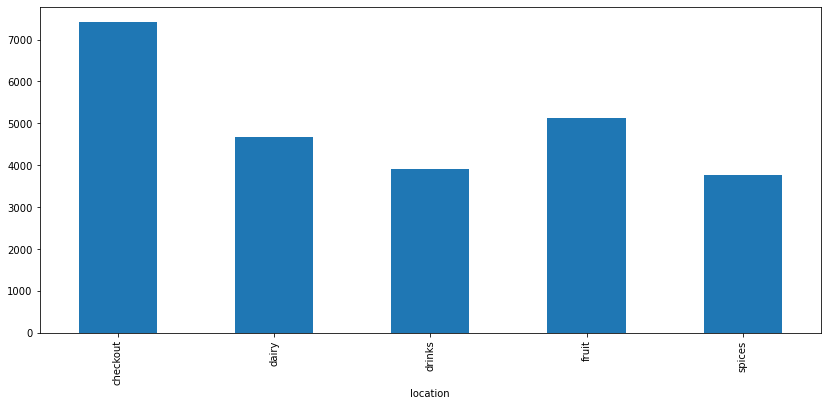

In [9]:
week.groupby('location')['customer_no'].count().plot(kind = 'bar');

## Calculate the total number of customers in each section over time

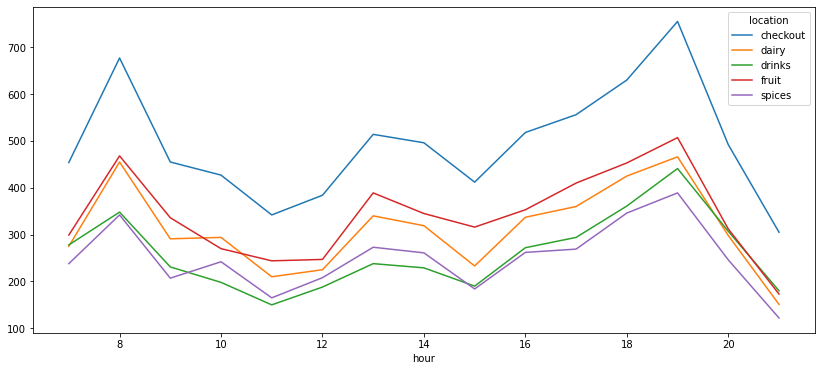

In [10]:
week['hour'] = week.index.hour
week.groupby('hour')['location'].value_counts().unstack().plot();

## Display the number of customers at checkout over time

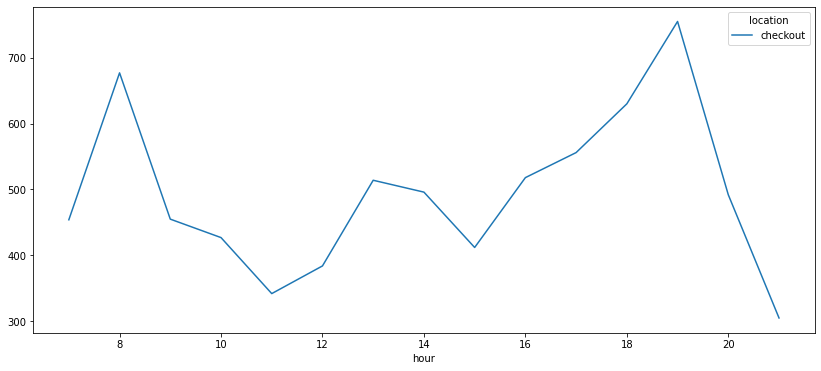

In [11]:
week_checkout = week[week['location'] == 'checkout']
week_checkout.groupby('hour')['location'].value_counts().unstack().plot();

## Calculate the time each customer spent in the market

In [12]:
week.head()

customer_no location     day  hour
timestamp                                              
2019-09-02 07:03:00            1    dairy  Monday     7
2019-09-02 07:03:00            2    dairy  Monday     7
2019-09-02 07:04:00            3    dairy  Monday     7
2019-09-02 07:04:00            4    dairy  Monday     7
2019-09-02 07:04:00            5   spices  Monday     7

In [13]:
cust_grp = week.groupby(['customer_no']).resample('min').ffill()

In [14]:
cust_grp = cust_grp.drop(columns ='customer_no') #why do I ned dis???!?!

In [15]:
cust_grp = cust_grp.reset_index()

In [16]:
cust_grp

customer_no           timestamp  location     day  hour
0                1 2019-09-02 07:03:00     dairy  Monday     7
1                1 2019-09-02 07:04:00     dairy  Monday     7
2                1 2019-09-02 07:05:00  checkout  Monday     7
3                2 2019-09-02 07:03:00     dairy  Monday     7
4                2 2019-09-02 07:04:00     dairy  Monday     7
...            ...                 ...       ...     ...   ...
53898         7443 2019-09-06 21:48:00     dairy  Friday    21
53899         7443 2019-09-06 21:49:00     dairy  Friday    21
53900         7443 2019-09-06 21:50:00  checkout  Friday    21
53901         7444 2019-09-06 21:50:00    drinks  Friday    21
53902         7445 2019-09-06 21:50:00    spices  Friday    21

[53903 rows x 5 columns]

In [17]:
cust_delta = pd.DataFrame(cust_grp.groupby('customer_no')['timestamp'].max() - cust_grp.groupby('customer_no')['timestamp'].min())

In [18]:
cust_delta

timestamp
customer_no                
1           0 days 00:02:00
2           0 days 00:03:00
3           0 days 00:02:00
4           0 days 00:04:00
5           0 days 00:01:00
...                     ...
7441        0 days 00:00:00
7442        0 days 00:02:00
7443        0 days 00:02:00
7444        0 days 00:00:00
7445        0 days 00:00:00

[7445 rows x 1 columns]

In [19]:
delta = []
for i in range(1,(len(cust_delta['timestamp'])+1)):
    delta.append((cust_delta['timestamp'][i].seconds)/60)

In [20]:
cust_delta['delta_min'] = delta

In [21]:
cust_delta

timestamp  delta_min
customer_no                           
1           0 days 00:02:00        2.0
2           0 days 00:03:00        3.0
3           0 days 00:02:00        2.0
4           0 days 00:04:00        4.0
5           0 days 00:01:00        1.0
...                     ...        ...
7441        0 days 00:00:00        0.0
7442        0 days 00:02:00        2.0
7443        0 days 00:02:00        2.0
7444        0 days 00:00:00        0.0
7445        0 days 00:00:00        0.0

[7445 rows x 2 columns]

## Calculate the total number of customers in the supermarket over time

In [22]:
week['customer_no'].max()

7445

### Our business managers think that the first section customers visit follows a different pattern than the following ones. Plot the distribution of customers of their first visited section versus following sections (treat all sections visited after the first as “following”).

In [23]:
cust_grp

customer_no           timestamp  location     day  hour
0                1 2019-09-02 07:03:00     dairy  Monday     7
1                1 2019-09-02 07:04:00     dairy  Monday     7
2                1 2019-09-02 07:05:00  checkout  Monday     7
3                2 2019-09-02 07:03:00     dairy  Monday     7
4                2 2019-09-02 07:04:00     dairy  Monday     7
...            ...                 ...       ...     ...   ...
53898         7443 2019-09-06 21:48:00     dairy  Friday    21
53899         7443 2019-09-06 21:49:00     dairy  Friday    21
53900         7443 2019-09-06 21:50:00  checkout  Friday    21
53901         7444 2019-09-06 21:50:00    drinks  Friday    21
53902         7445 2019-09-06 21:50:00    spices  Friday    21

[53903 rows x 5 columns]

In [24]:
cust_grp.groupby('customer_no')['timestamp'].min()

customer_no
1      2019-09-02 07:03:00
2      2019-09-02 07:03:00
3      2019-09-02 07:04:00
4      2019-09-02 07:04:00
5      2019-09-02 07:04:00
               ...        
7441   2019-09-06 21:48:00
7442   2019-09-06 21:48:00
7443   2019-09-06 21:48:00
7444   2019-09-06 21:50:00
7445   2019-09-06 21:50:00
Name: timestamp, Length: 7445, dtype: datetime64[ns]

## Calculating the Probability Matrix

In [25]:
cust_grp

customer_no           timestamp  location     day  hour
0                1 2019-09-02 07:03:00     dairy  Monday     7
1                1 2019-09-02 07:04:00     dairy  Monday     7
2                1 2019-09-02 07:05:00  checkout  Monday     7
3                2 2019-09-02 07:03:00     dairy  Monday     7
4                2 2019-09-02 07:04:00     dairy  Monday     7
...            ...                 ...       ...     ...   ...
53898         7443 2019-09-06 21:48:00     dairy  Friday    21
53899         7443 2019-09-06 21:49:00     dairy  Friday    21
53900         7443 2019-09-06 21:50:00  checkout  Friday    21
53901         7444 2019-09-06 21:50:00    drinks  Friday    21
53902         7445 2019-09-06 21:50:00    spices  Friday    21

[53903 rows x 5 columns]

In [26]:
cust_grp['location_after'] = cust_grp['location'].shift(-1)

In [27]:
cust_grp.tail(5)

customer_no           timestamp  location     day  hour location_after
53898         7443 2019-09-06 21:48:00     dairy  Friday    21          dairy
53899         7443 2019-09-06 21:49:00     dairy  Friday    21       checkout
53900         7443 2019-09-06 21:50:00  checkout  Friday    21         drinks
53901         7444 2019-09-06 21:50:00    drinks  Friday    21         spices
53902         7445 2019-09-06 21:50:00    spices  Friday    21            NaN

In [28]:
for i in range(len(cust_grp)):
    if cust_grp['location'][i] == 'checkout':
        cust_grp['location_after'][i] = 'checkout'
    else:
        pass  

<ipython-input-28-9b2cc5d790c4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_grp['location_after'][i] = 'checkout'


In [29]:
cust_grp

customer_no           timestamp  location     day  hour location_after
0                1 2019-09-02 07:03:00     dairy  Monday     7          dairy
1                1 2019-09-02 07:04:00     dairy  Monday     7       checkout
2                1 2019-09-02 07:05:00  checkout  Monday     7       checkout
3                2 2019-09-02 07:03:00     dairy  Monday     7          dairy
4                2 2019-09-02 07:04:00     dairy  Monday     7          dairy
...            ...                 ...       ...     ...   ...            ...
53898         7443 2019-09-06 21:48:00     dairy  Friday    21          dairy
53899         7443 2019-09-06 21:49:00     dairy  Friday    21       checkout
53900         7443 2019-09-06 21:50:00  checkout  Friday    21       checkout
53901         7444 2019-09-06 21:50:00    drinks  Friday    21         spices
53902         7445 2019-09-06 21:50:00    spices  Friday    21            NaN

[53903 rows x 6 columns]

In [30]:
probs = cust_grp.groupby('location')['location_after'].value_counts(normalize=True).unstack()

In [31]:
probs['dairy'][0] = 0
probs['drinks'][0] = 0
probs['fruit'][0] = 0
probs['spices'][0] = 0

In [32]:
probs #for the whole week

location_after  checkout     dairy    drinks     fruit    spices
location                                                        
checkout        1.000000  0.000000  0.000000  0.000000  0.000000
dairy           0.102678  0.737088  0.058625  0.050129  0.051480
drinks          0.215505  0.010899  0.598499  0.088012  0.087086
fruit           0.201054  0.095924  0.055162  0.597183  0.050677
spices          0.149912  0.193564  0.163135  0.091126  0.402262

In [101]:
probs.to_csv('probs.csv')

In [104]:
test = pd.read_csv('./le_market/probs.csv')

In [105]:
test

location  checkout     dairy    drinks     fruit    spices
0  checkout  1.000000  0.000000  0.000000  0.000000  0.000000
1     dairy  0.102678  0.737088  0.058625  0.050129  0.051480
2    drinks  0.215505  0.010899  0.598499  0.088012  0.087086
3     fruit  0.201054  0.095924  0.055162  0.597183  0.050677
4    spices  0.149912  0.193564  0.163135  0.091126  0.402262

In [33]:
initial_state = np.array([0, 0, 1, 0, 0]) #starting at drinks

In [34]:
np.dot(initial_state,probs) #testing probs

array([0.21550483, 0.01089862, 0.59849887, 0.08801152, 0.08708616])

In [36]:
orig = pd.read_csv('whole_week_w_next_prev.csv', delimiter =',', index_col='timestamp',parse_dates=True).iloc[:,1:]

## Time of Day

In [37]:
time_probs = orig.groupby(orig.index.hour)['location'].value_counts(normalize=True).unstack()

In [38]:
time_ppl = orig.groupby(orig.index.hour)['location'].value_counts().unstack()

In [39]:
time_ppl['sum'] = time_ppl.sum(axis=1)

In [40]:
time_ppl

location   checkout  dairy  drinks  fruit  spices   sum
timestamp                                              
7               454    275     278    299     238  1544
8               677    455     348    468     342  2290
9               455    291     231    336     207  1520
10              427    294     198    270     242  1431
11              342    210     150    244     165  1111
12              384    225     188    247     208  1252
13              514    340     238    389     273  1754
14              496    319     229    345     261  1650
15              412    233     190    316     184  1335
16              518    337     272    353     262  1742
17              556    360     294    410     269  1889
18              630    425     361    453     346  2215
19              755    466     441    507     389  2558
20              492    298     307    312     246  1655
21              305    151     180    173     122   931

In [106]:
time_ppl.to_csv('time_ppl.csv')

In [109]:
test = pd.read_csv('time_ppl.csv', index_col='timestamp')

In [110]:
test

checkout  dairy  drinks  fruit  spices   sum
timestamp                                              
7               454    275     278    299     238  1544
8               677    455     348    468     342  2290
9               455    291     231    336     207  1520
10              427    294     198    270     242  1431
11              342    210     150    244     165  1111
12              384    225     188    247     208  1252
13              514    340     238    389     273  1754
14              496    319     229    345     261  1650
15              412    233     190    316     184  1335
16              518    337     272    353     262  1742
17              556    360     294    410     269  1889
18              630    425     361    453     346  2215
19              755    466     441    507     389  2558
20              492    298     307    312     246  1655
21              305    151     180    173     122   931

## Starting Location

In [41]:
orig = pd.read_csv('whole_week_w_next_prev.csv', delimiter =',', index_col='timestamp',parse_dates=True).iloc[:,1:]

In [42]:
spawn = orig[orig['prev_loc']=='entrance']['location'].value_counts(normalize=True)
spawn

fruit     0.377435
dairy     0.287576
spices    0.181464
drinks    0.153526
Name: location, dtype: float64

In [111]:
type(spawn)

pandas.core.series.Series

In [112]:
spawn.to_csv('spawn.csv')

In [153]:
test = pd.read_csv('spawn.csv', index_col=0)

In [166]:
test['location']

fruit     0.377435
dairy     0.287576
spices    0.181464
drinks    0.153526
Name: location, dtype: float64

In [209]:
test.shape

(4, 1)

## Classes

## Building Classes

In [93]:
class Supermarket:
    
    def __init__(self, first_spawn, custperhour, cust_locations_probability):
        
        self.last_id = 0
        self.customers = []
        self.minutes = 0
        self.max_customers = 3
        self.feierabend = 840
        self.customers_recording = pd.DataFrame(columns=['customerID', 'location', 'minutes'])
        self.customer_spawn = first_spawn
        self.customer_fillrate = custperhour
        self.customer_locations_prob = cust_locations_probability
        
    def __repr__(self):
         return self.customers
        #return f"The customers in the supermarket are {self.customers}."
    
    def print_customers(self):
        """print all customers with the current time and id in CSV format.
        """
        self.customers_recording.to_csv(f'customers_after_{self.minutes}_minutes')
    
    def customer_info(self):
        """Show all customers and their current location"""
        
        for c in range(0,len(self.customers)):
            print (f"The customer {self.customers[c]} is in section {self.customers[c].location}.")
        
    def time_of_day_customer_mass(self):
        """Sets maximum number of customers according to hour of the day. Needs dataframe with Customernumbers per hour"""
        hour_of_day = round((420+self.minutes)/60)   #self.minutes
        if hour_of_day in self.customer_fillrate.index:
            self.max_customers = round(self.customer_fillrate.iloc[hour_of_day]['sum']*0.005) #downscaled for grafical simulation
        
        
    def next_minute(self):
        """propagates all customers to the next state.
        """
        self.time_of_day_customer_mass()
        self.minutes += 1
        if self.minutes < self.feierabend:
            for c in range(0,len(self.customers)):
                self.customers_recording = self.customers_recording.append({'customerID':self.customers[c], 'location':self.customers[c].location, 'minutes':self.minutes}, ignore_index=True) 

            self.remove_customers()

            for c in range(0,len(self.customers)):
                self.customers[c].change_location()

            self.add_new_customers()
            
        else:
            self.termination()
        
    def go_shopping(self, shopping_time):
        """Simulate all the minute steps until the feierabend-value is reached
            Needs number of minutes (int) as an argument
        """
        self.feierabend = shopping_time
        for t in range(0,self.feierabend):
            self.next_minute()
    
    def termination(self):
        for c in range(0,len(self.customers)):
            self.customers_recording = self.customers_recording.append({'customerID':self.customers[c], 'location':'checkout', 'minutes':self.minutes}, ignore_index=True)
        self.customers = []
        print('the supermarket is now closed')
    
    def add_new_customers(self):
        """creates new customers depending on the max customer number.
        """
        while (len(self.customers) < self.max_customers):
            self.last_id += 1
            customer = Customer(f"cust_id{self.last_id}", self.customer_spawn, self.customer_locations_prob)
            self.customers.append(customer)

    def remove_customers(self):
        """removes every customer that is not active any more.
            and save the ID, last location and timestamp to a dataframe (former_customers)
        """
        buffer = []
        for c in range(0,len(self.customers)):
            if self.customers[c].location != 'checkout':
                buffer.append(self.customers[c])
        self.customers = buffer
        
            

In [94]:
class Customer:
    
    def __init__(self, customer_name, customer_spawn, location_probability):
        
        self.name = customer_name
        self.location = np.random.choice(['dairy','fruit','drinks','spices'], p=customer_spawn)
        self.loc_sequence = []
        self.probs = location_probability
        self.possible_locations = ['checkout', 'dairy', 'drinks', 'fruit', 'spices']
        
        
    def __repr__(self):
        return self.name    

        
    def change_location(self):
        self.location = np.random.choice(self.possible_locations, p=self.probs.loc[self.location])
        
        

In [210]:
edeka = Supermarket(test['location'], time_ppl, probs)

In [211]:
edeka.customers

[]

In [208]:
edeka.max_customers

5

In [222]:
edeka.customer_info()

The customer cust_id1 is in section dairy.
The customer cust_id4 is in section drinks.
The customer cust_id8 is in section fruit.
The customer cust_id9 is in section spices.
The customer cust_id10 is in section checkout.
The customer cust_id11 is in section drinks.
The customer cust_id12 is in section dairy.
The customer cust_id13 is in section fruit.


In [207]:
edeka.go_shopping(400)

the supermarket is now closed
the supermarket is now closed
the supermarket is now closed
the supermarket is now closed
the supermarket is now closed
the supermarket is now closed
the supermarket is now closed


In [221]:
edeka.next_minute()

In [170]:
edeka.add_new_customers()

In [ ]:
edeka.remove_customers()

In [193]:
edeka.customers_recording

customerID  location minutes
0     cust_id1     fruit       2
1     cust_id2    drinks       2
2     cust_id3     dairy       2
3     cust_id4     fruit       2
4     cust_id5     dairy       2
..         ...       ...     ...
734  cust_id94  checkout     100
735  cust_id95  checkout     100
736  cust_id96  checkout     100
737  cust_id97  checkout     100
738  cust_id98  checkout     100

[739 rows x 3 columns]